# Objetivo é fazer uma analise exploratoria para ter novos insights e indicar se o cliente vai depositqar a prazo bancário ou não.

1. age: idade do cliente (numérico)

2. job: tipo de trabalho do cliente (categórico: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

3. marital: estado civil do cliente 

4. education: nível de escolaridade do cliente 

5. default: possui crédito em incumprimento? 

6. housing: possui empréstimo à habitação? 

7. loan: possui empréstimo pessoal? 

8. contact: tipo de contato com o cliente 

9. month: último mês de contato com o cliente

10. day_of_week: último dia da semana de contato com o cliente

11. duration: duração do último contato, em segundos.

12. Nota: este atributo não deve ser incluído na análise, pois é altamente correlacionado com a variável de saída (ou seja, se o cliente adquiriu ou não um depósito a prazo bancário).

13. campaign: número de contatos realizados durante esta campanha e para este cliente (numérico, incluindo o último contato)

14. pdays: número de dias desde o último contato do cliente em uma campanha anterior (numérico; 999 significa que o cliente não foi contatado anteriormente)

15. previous: número de contatos realizados antes desta campanha e para este cliente

16. poutcome: resultado da campanha de marketing anterior

17. emp.var.rate: taxa de variação do emprego - indicador trimestral 

18. cons.price.idx: índice de preços ao consumidor - indicador mensal

19. cons.conf.idx: índice de confiança do consumidor - indicador mensal 

20. euribor3m: taxa Euribor de 3 meses - indicador diário

21. nr.employed: número de funcionários - indicador trimestral 

22. y: o cliente adquiriu um depósito a prazo bancário? 

In [1]:
import pandas as pd

# Importar o conjunto de dados
df = pd.read_csv("/content/drive/MyDrive/Projetos/Análise Exploratória de Dados de um Banco/bank-additional-full.csv", sep=";")
df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2]:
#nenhum valor vaziu como podemos ver alem de ser um dataset grande e bem completo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [3]:
#verifiar as colunas numericas
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Analise Exploratoria

### Numericas

In [4]:
df['y'] = df['y'].astype('category') 
df['y'] = df['y'].cat.codes

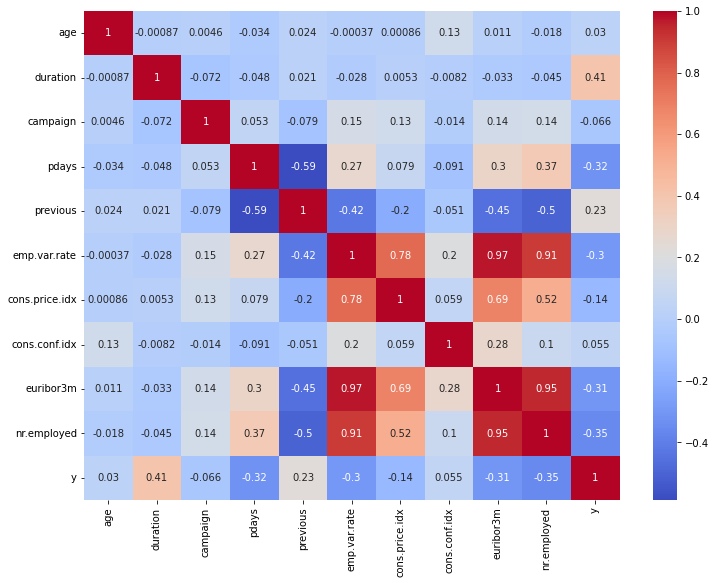

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
correlacao = df.corr()
sns.heatmap(correlacao, annot=True, cmap='coolwarm')
plt.show()

1. A variável duration (duração do último contato em segundos) tem uma forte correlação positiva com a variável de destino y (subscrição do depósito a prazo), o que indica que quanto maior a duração do último contato, maior a probabilidade de o cliente contratar o serviço bancário.

2. A variável nr.employed (número de funcionários) tem uma correlação negativa moderada com y, o que sugere que clientes que trabalham em empresas com menos funcionários têm uma maior probabilidade de contratar o serviço bancário.

3. As variáveis emp.var.rate, euribor3m e cons.price.idx têm uma forte correlação com y, o que indica que essas variáveis podem ser bons preditores da subscrição do depósito a prazo.

### Categoricas

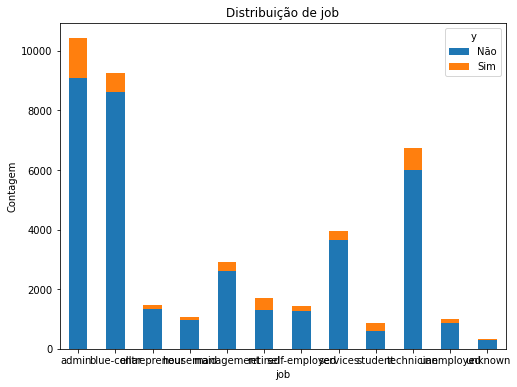

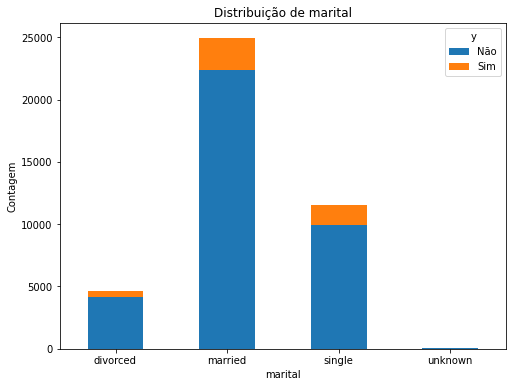

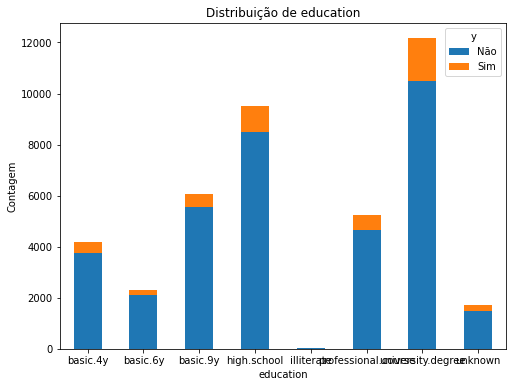

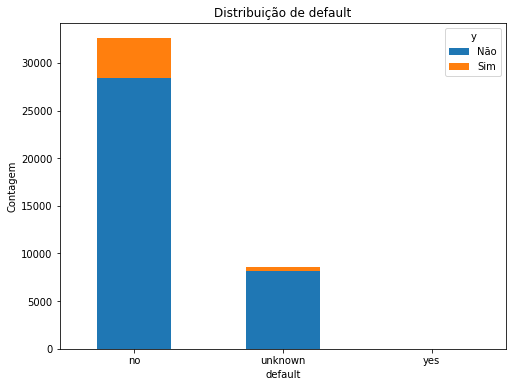

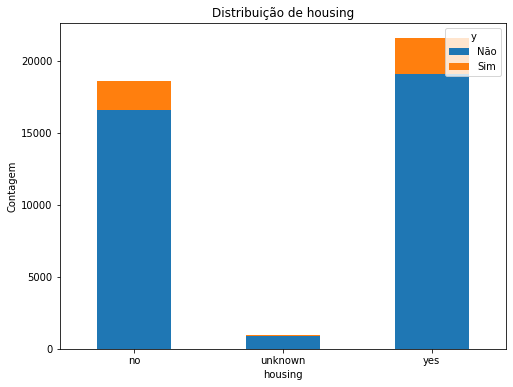

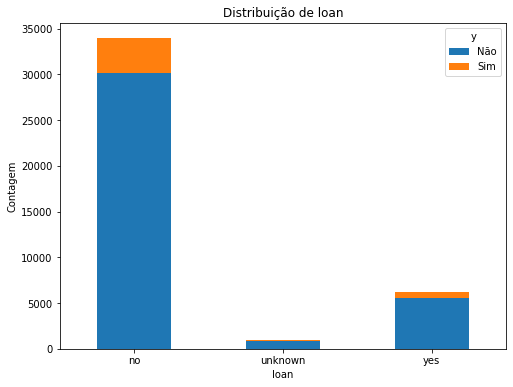

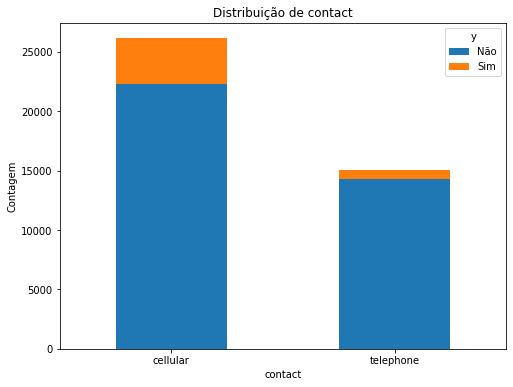

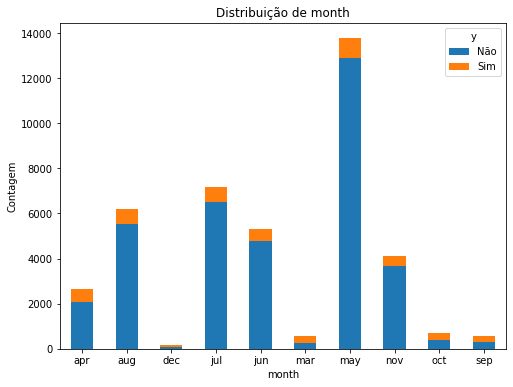

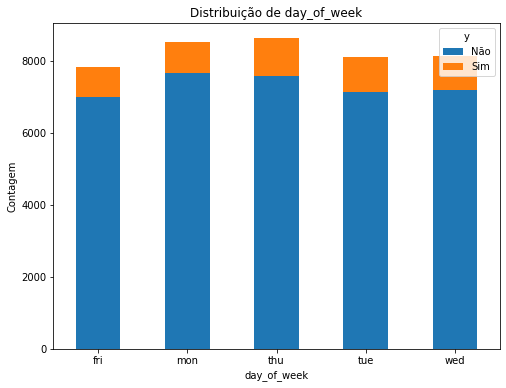

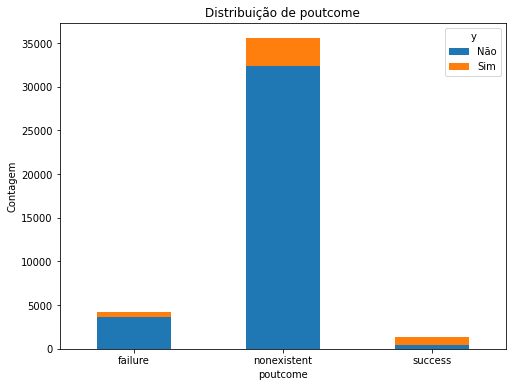

In [6]:
#distribuição por valores categoricos
for col in df.columns:
    if col != 'y' and df[col].dtype == 'object':
        fig, ax = plt.subplots(figsize=(8, 6))
        df.groupby([col, 'y']).size().unstack().plot(kind='bar', stacked=True, ax=ax)
        plt.title(f"Distribuição de {col}")
        plt.xlabel(col)
        plt.ylabel('Contagem')
        plt.xticks(rotation=0)
        plt.legend(title='y', loc='upper right', labels=['Não', 'Sim'])
        plt.show()

Observações: 
1. Boa parte das vendas e da base de dados são feitas com clientes que não são inadimplente (possivel ver na coluna default)
2. boa parte das campanhas de marketing que tem venda vem de clientes que usam celular. Isso pode ser explicado por alguns fatores, como a maior conveniência do celular em relação ao telefone fixo e a possibilidade de o cliente visualizar de imediato informações sobre o produto ou serviço.
3. Em Maio tivemos uma campanha forte para varios clientes em comparação a outros messes.

## VAMOS TREINAR AGORA ESSE MODELO PARA VER COMO CADA COLUNA TEM UMA INFLUEINCIA NA COMPRA DOS CLIENTES


### ANTES DE TREINAR VAMOS TRATAR OS DADOS
A inteligencia que usaremos não entende colunas categoricas, então vamos numera-las usando bibliotecas do python

In [7]:
df[df.select_dtypes(include=['category', 'object']).columns.tolist()]
#podemos ver que ass colunas month, day_of_week, y tem que ser classificada com label_encoder, o resto podemos usar o get_dummies

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent
...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent


In [8]:
df['month'] = df['month'].astype('category') 
df['month'] = df['month'].cat.codes
df['day_of_week'] = df['day_of_week'].astype('category') 
df['day_of_week'] = df['day_of_week'].cat.codes

# criar um dataframe com apenas as colunas categóricas
df_cat = df.select_dtypes(include=['object'])

# criar as variáveis dummy para cada coluna categórica
df_cat_encoded = pd.get_dummies(df_cat)

# concatenar o dataframe original com as variáveis dummy e tirar as categoricas anteriores
df_encoded = pd.concat([df.drop(df_cat.columns, axis=1), df_cat_encoded], axis=1)
df_encoded.head(3)

,age,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,6,1,261,1,999,0,1.1,93.994,-36.4,...,0,0,1,0,0,0,1,0,1,0
1,57,6,1,149,1,999,0,1.1,93.994,-36.4,...,0,0,1,0,0,0,1,0,1,0
2,37,6,1,226,1,999,0,1.1,93.994,-36.4,...,0,1,1,0,0,0,1,0,1,0


### Treinar o modelo

In [9]:
from sklearn.model_selection import train_test_split
#definir a variavel target no y e o restante no x
X=df_encoded.drop('y', axis=1)
y=df_encoded['y']
#dividir os valores para treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

xgb = XGBClassifier(n_estimators=100, max_depth=4,learning_rate=0.1,gamma=1, subsample=0.5, scale_pos_weight=1.25)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      9144
           1       0.65      0.64      0.65      1153

    accuracy                           0.92     10297
   macro avg       0.80      0.80      0.80     10297
weighted avg       0.92      0.92      0.92     10297

[[8746  398]
 [ 414  739]]


## features importance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 14.5 MB/s eta 0:00:00


 96%|=================== | 9879/10297 [00:19<00:00]       No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


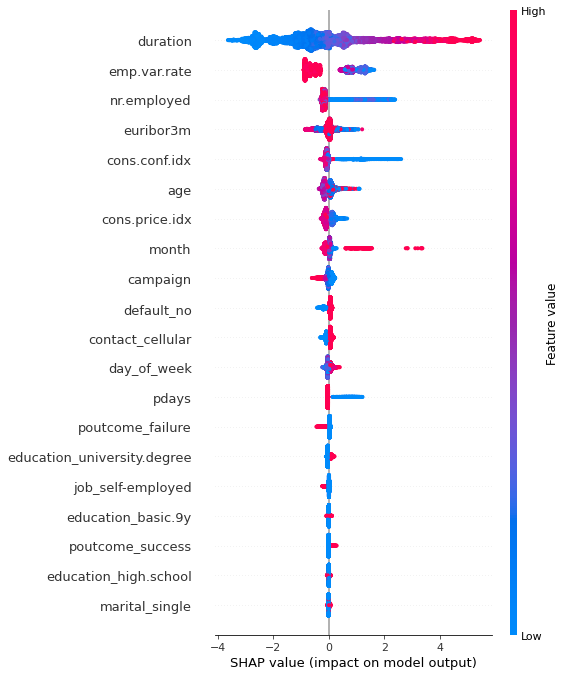

In [11]:
!pip install shap
import shap
explainer = shap.Explainer(xgb, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

In [12]:
y_test[y_test==1]
teste_y=y_test.reset_index()
teste_x=X_test.reset_index()
teste_y[teste_y['y']==1]
teste_x[teste_x['index']==37480]

,index,age,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
19,37480,46,1,2,399,1,999,1,-2.9,92.201,...,0,1,1,0,0,1,0,1,0,0


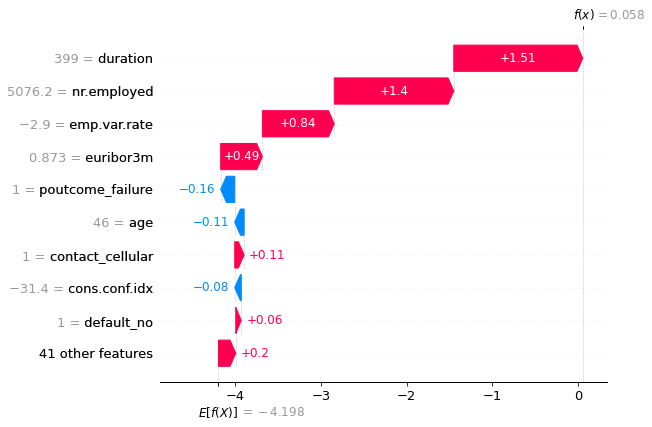

In [13]:
shap.plots.waterfall(shap_values[19])

In [15]:
import numpy as np

probas = xgb.predict_proba(X_test)

# Aplicando o limiar de decisão (0,5) para obter as previsões do modelo
y_pred = np.where(probas[:, 1] > 0.5, 1, 0)

# Verificando se a linha 42 previu y=1 ou y=0
if y_pred[19] == 1:
    print("A linha previu y=1.")
else:
    print("A linha previu y=0.")

A linha previu y=1.


In [16]:
df_final=pd.DataFrame(X_test)
df_final['y_test'] = y_test

# Adicionando a coluna de previsões y_pred ao DataFrame
df_final['y_pred'] = y_pred
df_final

,age,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success,y_test,y_pred
32884,57,6,1,371,1,999,1,-1.8,92.893,-46.2,...,0,0,1,1,0,1,0,0,0,0
3169,55,6,2,285,2,999,0,1.1,93.994,-36.4,...,1,0,0,0,1,0,1,0,0,0
32206,33,6,0,52,1,999,1,-1.8,92.893,-46.2,...,1,0,0,1,0,1,0,0,0,0
9403,36,4,0,355,4,999,0,1.4,94.465,-41.8,...,1,0,0,0,1,0,1,0,0,0
14020,27,3,0,189,2,999,0,1.4,93.918,-42.7,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35087,41,6,0,10,5,999,0,-1.8,92.893,-46.2,...,1,0,0,1,0,0,1,0,0,0
12883,44,3,3,70,2,999,0,1.4,93.918,-42.7,...,0,0,1,1,0,0,1,0,0,0
3588,39,6,0,216,1,999,0,1.1,93.994,-36.4,...,1,0,0,0,1,0,1,0,0,0
31192,46,6,4,96,2,999,1,-1.8,92.893,-46.2,...,1,0,0,1,0,1,0,0,0,0


## como salvar e carregar o modelo criado

In [17]:
#salva isso ai pro futuro
import joblib
# Salvar o modelo treinado em um arquivo
joblib.dump(xgb, 'modelo_treinado.joblib')
# Carregar o modelo salvo em um arquivo
xgb_salvo = joblib.load('modelo_treinado.joblib')